In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os , sys
import numpy as np
if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

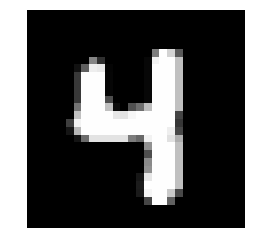

In [5]:
displaychar(train_data[58])

In [6]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [10]:
from sklearn.svm import LinearSVC
def fit_linear_classifier(C_value=1.0):
    clf = LinearSVC(C=C_value, loss='hinge')
    clf.fit(train_data,train_labels)
    ## Get predictions on training data
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    ## Get predictions on test data
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    ##
    return test_error

In [11]:
cvals = [0.01,0.1,1.0,10.0,100.0]
for c in cvals:
    test_error = fit_linear_classifier(c)
    print ("Error rate for C = %0.2f: test %0.3f" % (c, test_error))

Error rate for C = 0.01: test 0.010
Error rate for C = 0.10: test 0.009
Error rate for C = 1.00: test 0.009
Error rate for C = 10.00: test 0.011
Error rate for C = 100.00: test 0.028


In [7]:
from sklearn.svm import SVC
def fit_quadratic_classifier(C_value=1.0):
    clf = SVC(C=C_value, kernel='poly',degree=2)
    clf.fit(train_data,train_labels)
    ## Get predictions on training data
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    ## Get predictions on test data
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    ##
    return train_error, test_error

In [9]:
train_error, test_error = fit_quadratic_classifier(1.0)
print ("Error rate for C = %0.2f: train %0.3f test %0.3f" % (1.0, train_error, test_error))

Error rate for C = 1.00: train 0.000 test 0.003
